In [38]:
#CS503 Data Visualisation Final Project
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/Colab Notebooks/CS503 Data Visualization"
!pip install plotly --upgrade

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/CS503 Data Visualization'
/content/drive/My Drive/Colab Notebooks/CS503 Data Visualization
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [39]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

df_humdev = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS503 Data Visualization/human_development.csv")
df_gendev = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS503 Data Visualization/gender_development.csv")

In [40]:
#data preprossecing
df_humdev_hdi = df_humdev[['Country','Human Development Index (HDI)','Gross National Income (GNI) per Capita','HDI Rank']]
df_humdev_hdi_top = df_humdev_hdi.sort_values(by=['Human Development Index (HDI)'],ascending=False).head(10)
df_humdev_hdi_bottom = df_humdev_hdi.sort_values(by=['Human Development Index (HDI)'],ascending=True).head(10)
df_humdev_hdi_top['Human Development Index (HDI)'] = df_humdev_hdi_top['Human Development Index (HDI)'].round(2)
df_humdev_hdi_bottom['Human Development Index (HDI)'] = df_humdev_hdi_bottom['Human Development Index (HDI)'].round(2)

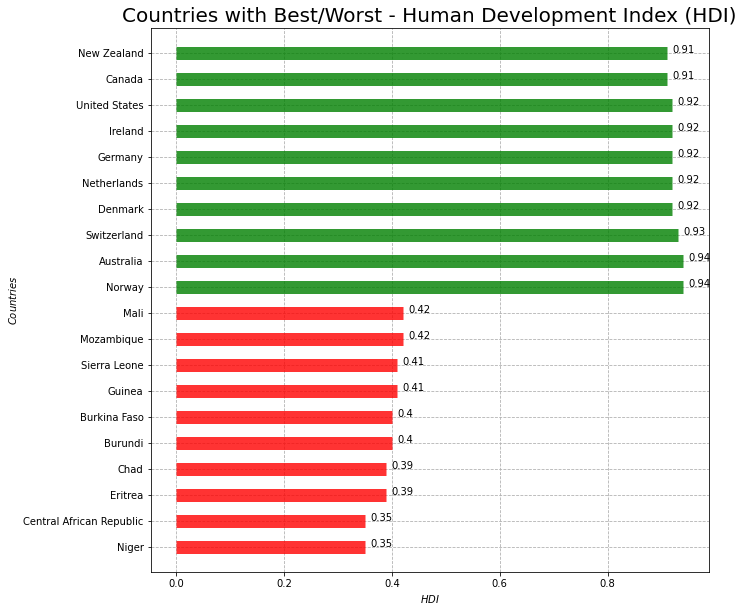

In [41]:
#hlnes graph to illustrate Human development Index (HDI)
fig, ax = plt.subplots(figsize =(10, 10)) 
  
for index, row in df_humdev_hdi_bottom.iterrows():
  ax.hlines(y = row[0] , xmin = 0, xmax = row[1], label ="bottom", color ='r', alpha=0.8, linewidth=13)
  plt.text(row[1] + 0.01, row[0], row[1], fontsize=10)

for index, row in df_humdev_hdi_top.iterrows():
  ax.hlines(y = row[0] , xmin = 0, xmax = row[1], label ="top", color ='g', alpha=0.8, linewidth=13)
  plt.text(row[1] + 0.01, row[0], row[1], fontsize=10)

plt.gca().set(ylabel='$Countries$', xlabel='$HDI$')
plt.title('Countries with Best/Worst - Human Development Index (HDI)', fontdict={'size':20})
plt.grid(linestyle='--', alpha=1)
plt.show()

In [42]:
#interative 3d scatter plot for corelation between Rank and GNI
df_humdev_hdi_3d = df_humdev_hdi
df_humdev_hdi_3d = df_humdev_hdi_3d.rename(columns={"Human Development Index (HDI)": "HDI", "Gross National Income (GNI) per Capita" : "GNI", "HDI Rank" : "Rank"})
df_humdev_hdi_3d = df_humdev_hdi_3d.sample(frac=1)
df_humdev_hdi_3d['GNI'] = (df_humdev_hdi_3d['GNI'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df_humdev_hdi_3d['GNI'] = df_humdev_hdi_3d['GNI'].astype(float)
mean = df_humdev_hdi_3d['GNI'].mean()
def get_status(passedValue):
    if passedValue['GNI'] >= mean:
        return "Above mean GNI"
    elif passedValue['GNI'] < mean:
        return "Below mean GNI"
df_humdev_hdi_3d['GNI Average'] = df_humdev_hdi_3d.apply(get_status, axis = 1) 

fig = px.scatter_3d(df_humdev_hdi_3d, x='Country', y='GNI', z='Rank',
              color=df_humdev_hdi_3d['GNI Average'])
fig.update_xaxes(type='category',title_font = {"size": 10})
#fig.update_zaxes(autorange = "reversed")
fig.update_layout(title="Correlation between Human Development Index (HDI) Rank and" + "<br>" + "Gross National Income (GNI) per Capita", scene = dict(
                    zaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    xaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),), autosize=False, width=1000, height = 800)
fig.show()

In [43]:
#interactive bar graph to illustrate Expected vs mean education
df_humdev_edu = df_humdev[['Country','Expected Years of Education', 'Mean Years of Education']]

fig = px.bar(df_humdev_edu,
             x = df_humdev_edu['Country'],
             y = ['Mean Years of Education','Expected Years of Education'],width=1800, height=800)
fig.update_xaxes(type='category')
fig.update_layout(title="Expected and Mean Years of Education ",
    xaxis_title="Countries",
    yaxis_title="Years",
    legend_title="Education Projections")
fig.show()

In [44]:
#Interactive scatter plot graph to compare life expectancy
df_gendev_lifeexp = df_gendev[['Country','Life Expectancy at Birth (Female)', 'Life Expectancy at Birth (Male)']]
fig = go.Figure()
fig.add_trace(go.Scatter(y = df_gendev_lifeexp['Life Expectancy at Birth (Female)'], x=df_gendev_lifeexp['Country'],
                    mode='lines+markers',
                    name='Female',
                    line_color='rgb(231,107,243)'))

fig.add_trace(go.Scatter(y = df_gendev_lifeexp['Life Expectancy at Birth (Male)'], x=df_gendev_lifeexp['Country'],
                    mode='lines+markers',
                    name='Male',
                    line_color='rgb(0,176,246)'))
fig.update_yaxes(autorange = "reversed")
fig.update_layout(title='Life Expectancy at Birth by Gender',
                   xaxis_title='Country',
                   yaxis_title='Age (in Years)',
                  autosize=False, width=1800, height = 800)

In [45]:
# Interactive 3d plot to correlate GDI and Female Development Index
df_gendev_3d = df_gendev[['Country','Gender Development Index (GDI)','Human Development Index (Female)', 'Human Development Index (Male)']]
df_gendev_3d = df_gendev_3d.rename(columns={"Gender Development Index (GDI)": "GDI", "Human Development Index (Female)" : "Female Development Index"})
#df_gendev_3d = df_gendev_3d.sample(frac=1)
fig = px.scatter_3d(df_gendev_3d, x='Country', z='Female Development Index', y='GDI',
              color=df_humdev_hdi_3d['Country'])
fig.update_xaxes(type='category',title_font = {"size": 10})
fig.update_layout(title="Correlation between Gender Development Index (GDI) and" + "<br>" + "Human Development Index (Female)", scene = dict(
                    zaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    xaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),), autosize=False, width=1000, height = 800)
fig.show()

In [46]:
# Interactive 3d plot to correlate GDI and Male Development Index
df_gendev_3d = df_gendev[['Country','Gender Development Index (GDI)','Human Development Index (Female)', 'Human Development Index (Male)']]
df_gendev_3d = df_gendev_3d.rename(columns={"Gender Development Index (GDI)": "GDI", "Human Development Index (Male)" : "Male Development Index"})
#df_gendev_3d = df_gendev_3d.sample(frac=1)
fig = px.scatter_3d(df_gendev_3d, x='Country', z='Male Development Index', y='GDI',
              color=df_humdev_hdi_3d['Country'])
fig.update_xaxes(type='category',title_font = {"size": 10})

fig.update_layout(title="Correlation between Gender Development Index (GDI) and" + "<br>" + "Human Development Index (Male)", scene = dict(
                    zaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    xaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
          zerolinecolor="white",),), autosize=False, width=1000, height = 800)
fig.show()

In [47]:
#interactive sunburst graph for education in top/bottom GDI rank
educationPlot = df_gendev[df_gendev['Country'].notna()]
educationPlot = educationPlot[['Country', 'Expected Years of Education (Female)', 'Expected Years of Education (Male)', 'Mean Years of Education (Female)', 'Mean Years of Education (Male)']]
educationPlot = educationPlot.fillna(0)
educationPlot.replace('..', np.nan, inplace=True)
educationPlot = educationPlot.dropna()
educationPlot = educationPlot.astype({"Country": str, "Expected Years of Education (Female)": float, "Expected Years of Education (Male)": float, "Mean Years of Education (Female)": float, "Mean Years of Education (Male)":float})
educationPlot['Total Mean Years of Education'] = educationPlot.apply(lambda row: row['Mean Years of Education (Female)'] + row['Mean Years of Education (Male)'], axis=1)
educationPlot = educationPlot.sort_values(by=['Total Mean Years of Education'], ascending=False)
topValues = educationPlot.iloc[:10]
splitedEducationValues = topValues.rename(columns={"Mean Years of Education (Female)": "Female", 
                                        "Mean Years of Education (Male)": "Male"})
splitedEducationValues = pd.melt(splitedEducationValues, 
                                 id_vars=['Country'], 
                                 value_vars=['Female', 'Male'],
                                 var_name='Gender', value_name='Education Expectation')
fig = px.sunburst(splitedEducationValues, path=['Country', 'Gender'], values='Education Expectation')
fig.update_layout(title="Education details on Countries with"+"<br>"+ "Best Gender Development Index(GDI)", autosize=False, width=500, height = 500)
fig.show()

In [48]:
bottomValues = educationPlot.iloc[-10:]
bottomSplittedValues = bottomValues.rename(columns={"Mean Years of Education (Female)": "Female", 
                                        "Mean Years of Education (Male)": "Male"})
bottomSplittedValues = pd.melt(bottomSplittedValues, 
                                 id_vars=['Country'], 
                                 value_vars=['Female', 'Male'],
                                 var_name='Gender', value_name='Education Expectation')

fig = px.sunburst(bottomSplittedValues, path=['Country', 'Gender'], values='Education Expectation')
fig.update_layout(title="Education details on Countries with with"+"<br>"+ "Least Gender Development Index(GDI)", autosize=False, width=500, height = 500)
fig.show()